In [17]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [18]:
type(data)

dict

In [20]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [21]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11025,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969561e+07,1.969561e+07,False,NaN,1,NaN,NaN,None,2024-05-08T20:17:00.000Z,62066.050899,2.536562e+10,3.4512,-0.386745,-1.661822,9.446951,-13.344287,-9.338628,36.222992,1.222429e+12,53.4202,1.303387e+12,None,2024-05-08T20:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 01:20:30.859054
1,1027,Ethereum,ETH,ethereum,8902,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201033e+08,1.201033e+08,True,NaN,2,NaN,NaN,None,2024-05-08T20:16:00.000Z,2988.275537,1.133127e+10,1.0552,-0.525618,-2.154722,2.242580,-19.021200,-23.300555,23.021656,3.589018e+11,15.6785,3.589018e+11,None,2024-05-08T20:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 01:20:30.859054
2,825,Tether USDt,USDT,tether,84933,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.109560e+11,1.130866e+11,True,NaN,3,NaN,NaN,None,2024-05-08T20:16:00.000Z,0.999804,4.558928e+10,3.6511,-0.003219,-0.004761,0.086909,-0.021116,-0.248571,-0.034362,1.109342e+11,4.8461,1.130644e+11,None,2024-05-08T20:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-09 01:20:30.859054
3,1839,BNB,BNB,bnb,2154,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475872e+08,1.475872e+08,False,NaN,4,NaN,NaN,None,2024-05-08T20:16:00.000Z,587.586037,1.578523e+09,6.1463,0.245972,0.164762,6.114498,-0.218247,21.123053,84.515650,8.672015e+10,3.7897,8.672015e+10,None,2024-05-08T20:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 01:20:30.859054
4,5426,Solana,SOL,solana,656,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.480963e+08,5.755448e+08,True,NaN,5,NaN,NaN,None,2024-05-08T20:16:00.000Z,142.960867,2.400159e+09,-8.9951,-2.291426,-5.794319,10.105852,-20.401392,-2.214029,39.283980,6.406024e+10,2.7978,8.228039e+10,None,2024-05-08T20:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 01:20:30.859054
5,3408,USDC,USDC,usd-coin,18946,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.304550e+10,3.304550e+10,False,NaN,6,NaN,NaN,None,2024-05-08T20:16:00.000Z,1.000045,5.432935e+09,4.2606,0.012028,0.003661,-0.024091,0.000244,0.004811,-0.002981,3.304697e+10,1.4433,3.304697e+10,None,2024-05-08T20:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-09 01:20:30.859054
6,52,XRP,XRP,xrp,1314,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.523591e+10,9.998765e+10,False,NaN,7,NaN,NaN,None,2024-05-08T20:17:00.000Z,0.522616,1.129684e+09,3.1195,-0.664251,-2.601953,2.522805,-16.209366,-15.927283,1.168199,2.886715e+10,1.2638,5.226156e+10,None,2024-05-08T20:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 01:20:30.859054
7,74,Dogecoin,DOGE,dogecoin,962,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.442101e+11,1.442101e+11,True,NaN,8,NaN,NaN,None,2024-05-08T20:17:00.000Z,0.145445,1.131142e+09,5.0805,-1.312998,-5.514450,14.466290,-27.653844,-17.667534,80.862616,2.097463e+10,0.9181,2.097463e+10,None,2024-05-08T20:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 01:20:30.859054
8,11419,Toncoin,TON,toncoin,312,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.473413e+

In [37]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
        
    #df2 = pd.json_normalize(data['data'])
    #df2['timestamp'] = pd.to_datetime('now')
    #df = df2.append(df2)


        # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    # Appending data in local disk
    if not os.path.isfile(r'C:\Users\DENOVO\Desktop\Changing File Types\csv files\API.csv'):
        df.to_csv(r'C:\Users\DENOVO\Desktop\Changing File Types\csv files\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\DENOVO\Desktop\Changing File Types\csv files\API.csv', mode='a', header=False) 
    #Then to read in the file: 
    df = pd.read_csv(r'C:\Users\DENOVO\Desktop\Changing File Types\csv files\API.csv')


In [39]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('Api Runner Completed Successfully')
    sleep(60)  #Sleep of 1 minute
exit()

Api Runner Completed Successfully
Api Runner Completed Successfully
Api Runner Completed Successfully
Api Runner Completed Successfully


KeyboardInterrupt: 

In [41]:
df72 = pd.read_csv(r"C:\Users\DENOVO\Desktop\Changing File Types\csv files\API.csv")
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11026,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.969578e+07,1.969578e+07,False,NaN,1,NaN,NaN,NaN,2024-05-09T06:03:00.000Z,61606.387180,2.499791e+10,-0.6549,0.147420,-1.651440,7.274804,-13.339407,-11.265428,33.309276,1.213390e+12,53.1372,1.293730e+12,NaN,2024-05-09T06:03:00.000Z,NaN,NaN,NaN,NaN,NaN,04:34.7
1,1,1027,Ethereum,ETH,ethereum,8905,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201052e+08,1.201052e+08,True,NaN,2,NaN,NaN,NaN,2024-05-09T06:02:00.000Z,3004.990851,1.137858e+10,-0.2929,0.390433,-0.654713,3.144808,-18.575209,-23.839091,22.547128,3.609150e+11,15.8063,3.609150e+11,NaN,2024-05-09T06:02:00.000Z,NaN,NaN,NaN,NaN,NaN,04:34.7
2,2,825,Tether USDt,USDT,tether,84947,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.109560e+11,1.130870e+11,True,NaN,3,NaN,NaN,NaN,2024-05-09T06:02:00.000Z,0.999494,4.558611e+10,1.8561,0.004461,-0.040171,0.036012,-0.046387,-0.245958,-0.035601,1.109000e+11,4.8569,1.130290e+11,NaN,2024-05-09T06:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,04:34.7
3,3,1839,BNB,BNB,bnb,2154,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475871e+08,1.475871e+08,False,NaN,4,NaN,NaN,NaN,2024-05-09T06:02:00.000Z,598.818948,1.740131e+09,11.6203,0.548840,2.430092,9.374666,2.547012,21.242411,86.653026,8.837795e+10,3.8695,8.837795e+10,NaN,2024-05-09T06:02:00.000Z,NaN,NaN,NaN,NaN,NaN,04:34.7
4,4,5426,Solana,SOL,solana,657,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.481422e+08,5.755430e+08,True,NaN,5,NaN,NaN,NaN,2024-05-09T06:02:00.000Z,144.577610,2.433728e+09,-2.8836,0.524958,-1.862147,11.657825,-18.872476,-2.172949,37.703406,6.479133e+10,2.8377,8.321063e+10,NaN,2024-05-09T06:02:00.000Z,NaN,NaN,NaN,NaN,NaN,04:34.7
5,5,3408,USDC,USDC,usd-coin,18983,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.308806e+10,3.308806e+10,False,NaN,6,NaN,NaN,NaN,2024-05-09T06:02:00.000Z,0.999938,5.260691e+09,-2.4678,-0.002077,-0.001348,-0.008980,-0.006425,-0.000189,-0.000216,3.308603e+10,1.4486,3.308603e+10,NaN,2024-05-09T06:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,04:34.7
6,6,52,XRP,XRP,xrp,1314,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.535918e+10,9.998763e+10,False,NaN,7,NaN,NaN,NaN,2024-05-09T06:03:00.000Z,0.522265,1.016799e+09,-11.9116,0.260548,0.139039,2.105506,-15.288792,-16.208507,0.762787,2.891218e+10,1.2661,5.222653e+10,NaN,2024-05-09T06:03:00.000Z,NaN,NaN,NaN,NaN,NaN,04:34.7
7,7,74,Dogecoin,DOGE,dogecoin,963,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.442150e+11,1.442150e+11,True,NaN,8,NaN,NaN,NaN,2024-05-09T06:03:00.000Z,0.147867,1.135918e+09,5.7028,0.480268,-1.396245,17.485660,-26.056320,-16.704079,83.290476,2.132462e+10,0.9337,2.132462e+10,NaN,2024-05-09T06:03:00.000Z,NaN,NaN,NaN,NaN,NaN,04:34.7
8,8,11419,Toncoin,TON,toncoin,312,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,3.473431e+09,5.106350e+09,True,NaN,9,3.414167e+09,2.022953e+10,NaN,2024-05-09T06:02:00.000Z,5.925174,2.003309e+08,15.8628,0.432344,2.877710,25.419

In [43]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [44]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11026,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19695781.00000,19695781.00000,False,NaN,1,NaN,NaN,NaN,2024-05-09T06:03:00.000Z,61606.38718,24997911370.01138,-0.65490,0.14742,-1.65144,7.27480,-13.33941,-11.26543,33.30928,1213385910151.14355,53.13720,1293734130836.13989,NaN,2024-05-09T06:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 11:04:34.746375
1,1,1027,Ethereum,ETH,ethereum,8905,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120105242.69584,120105242.69584,True,NaN,2,NaN,NaN,NaN,2024-05-09T06:02:00.000Z,3004.99085,11378581270.19703,-0.29290,0.39043,-0.65471,3.14481,-18.57521,-23.83909,22.54713,360915155415.58917,15.80630,360915155415.59003,NaN,2024-05-09T06:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 11:04:34.746375
2,2,825,Tether USDt,USDT,tether,84947,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,110955976510.79590,113086550461.08405,True,NaN,3,NaN,NaN,NaN,2024-05-09T06:02:00.000Z,0.99949,45586114922.65750,1.85610,0.00446,-0.04017,0.03601,-0.04639,-0.24596,-0.03560,110899812576.22289,4.85690,113029308068.00999,NaN,2024-05-09T06:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-09 11:04:34.746375
3,3,1839,BNB,BNB,bnb,2154,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147587103.25370,147587103.25370,False,NaN,4,NaN,NaN,NaN,2024-05-09T06:02:00.000Z,598.81895,1740131464.99625,11.62030,0.54884,2.43009,9.37467,2.54701,21.24241,86.65303,88377953861.49182,3.86950,88377953861.49001,NaN,2024-05-09T06:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 11:04:34.746375
4,4,5426,Solana,SOL,solana,657,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,448142241.99027,575542997.14966,True,NaN,5,NaN,NaN,NaN,2024-05-09T06:02:00.000Z,144.57761,2433728080.12825,-2.88360,0.52496,-1.86215,11.65783,-18.87248,-2.17295,37.70341,64791334107.46238,2.83770,83210630749.56000,NaN,2024-05-09T06:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 11:04:34.746375
5,5,3408,USDC,USDC,usd-coin,18983,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,33088064923.71405,33088064923.71405,False,NaN,6,NaN,NaN,NaN,2024-05-09T06:02:00.000Z,0.99994,5260690581.55129,-2.46780,-0.00208,-0.00135,-0.00898,-0.00643,-0.00019,-0.00022,33086025133.45642,1.44860,33086025133.46000,NaN,2024-05-09T06:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-09 11:04:34.746375
6,6,52,XRP,XRP,xrp,1314,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55359176420.00000,99987633657.00000,False,NaN,7,NaN,NaN,NaN,2024-05-09T06:03:00.000Z,0.52227,1016798580.10531,-11.91160,0.26055,0.13904,2.10551,-15.28879,-16.20851,0.76279,28912177017.30566,1.26610,52226530246.68000,NaN,2024-05-09T06:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 11:04:34.746375
7,7,74,Dogecoin,DOGE,dogecoin,963,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,144215216383.70520,144215216383.70520,True,NaN,8,NaN,NaN,NaN,2024-05-09T06:03:00.000Z,0.14787,1135917569.90027,5.70280,0.48027,-1.39625,17.48566,-26.05632,-16.70408,83.29048,21324624400.98656,0.93370,21324624400.99000,NaN,2024-05-09T06:03

In [45]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d
name,,,,,
Bitcoin,0.04967,-1.52975,7.02009,-13.11900,-11.31387
Ethereum,0.02476,-0.60126,3.00803,-17.99482,-23.96996
Tether USDt,-0.00568,-0.02761,0.02715,-0.06302,-0.21955
BNB,0.39763,2.59952,9.51122,3.02972,21.25400
Solana,0.30511,-1.97382,11.67680,-18.21324,-1.89307
USDC,-0.00725,0.00351,-0.00688,0.00548,0.00625
XRP,-0.21408,-0.00826,2.11531,-15.63429,-16.59360
Dogecoin,-0.05989,-1.34592,16.84684,-25.81522,-16.84043
Toncoin,1.42297,4.66805,26.73579,-11.95184,109.97805


In [46]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.04967
              quote.USD.percent_change_24h    -1.52975
              quote.USD.percent_change_7d      7.02009
              quote.USD.percent_change_30d   -13.11900
              quote.USD.percent_change_60d   -11.31387
Ethereum      quote.USD.percent_change_1h      0.02476
              quote.USD.percent_change_24h    -0.60126
              quote.USD.percent_change_7d      3.00803
              quote.USD.percent_change_30d   -17.99482
              quote.USD.percent_change_60d   -23.96996
Tether USDt   quote.USD.percent_change_1h     -0.00568
              quote.USD.percent_change_24h    -0.02761
              quote.USD.percent_change_7d      0.02715
              quote.USD.percent_change_30d    -0.06302
              quote.USD.percent_change_60d    -0.21955
BNB           quote.USD.percent_change_1h      0.39763
              quote.USD.percent_change_24h     2.59952
              quote.US

In [47]:
df5 = df4.to_frame(name='Change_in_Values')
df5

Change_in_Values
name                                                       
Bitcoin      quote.USD.percent_change_1h            0.04967
             quote.USD.percent_change_24h          -1.52975
             quote.USD.percent_change_7d            7.02009
             quote.USD.percent_change_30d         -13.11900
             quote.USD.percent_change_60d         -11.31387
Ethereum     quote.USD.percent_change_1h            0.02476
             quote.USD.percent_change_24h          -0.60126
             quote.USD.percent_change_7d            3.00803
             quote.USD.percent_change_30d         -17.99482
             quote.USD.percent_change_60d         -23.96996
Tether USDt  quote.USD.percent_change_1h           -0.00568
             quote.USD.percent_change_24h          -0.02761
             quote.USD.percent_change_7d            0.02715
             quote.USD.percent_change_30d          -0.06302
             quote.USD.percent_change_60d          -0.21955
BNB          quote.USD.percent_change_1h            0.39763
             quote.USD.percent_change_24h           2.59952
             quote.USD.percent_change_7d            9.51122
             quote.USD.percent_change_30d           3.02972
             quote.USD.percent_change_60d          21.25400
Solana       quote.USD.percent_change_1h            0.30511
             quote.USD.percent_change_24h          -1.97382
             quote.USD.percent_change_7d           11.67680
             quote.USD.percent_change_30d         -18.21324
             quote.USD.percent_change_60d          -1.89307
USDC         quote.USD.percent_change_1h           -0.00725
             quote.USD.percent_change_24h           0.00351
             quote.USD.percent_change_7d           -0.00688
             quote.USD.percent_change_30d           0.00548
             quote.USD.percent_change_60d           0.00625
XRP          quote.USD.percent_change_1h           -0.21408
             quote.USD.percent_change_24h          -0.00826
             quote.USD.percent_change_7d            2.11531
             quote.USD.percent_change_30d         -15.63429
             quote.USD.percent_change_60d         -16.59360
Dogecoin     quote.USD.percent_change_1h           -0.05989
             quote.USD.percent_change_24h          -1.34592
             quote.USD.percent_change_7d           16.84684
             quote.USD.percent_change_30d         -25.81522
             quote.USD.percent_change_60d         -16.84043
Toncoin      quote.USD.percent_change_1h            1.42297
             quote.USD.percent_change_24h           4.66805
             quote.USD.percent_change_7d           26.73579
             quote.USD.percent_change_30d         -11.95184
             quote.USD.percent_change_60d         109.97805
Cardano      quote.USD.percent_change_1h           -0.20285
             quote.USD.percent_change_24h           3.69743
             quote.USD.percent_change_7d            3.29545
             quote.USD.percent_change_30d         -24.64389
             quote.USD.percent_change_60d         -37.50770
Shiba Inu    quote.USD.percent_change_1h            0.11787
             quote.USD.percent_change_24h          -0.08515
             quote.USD.percent_change_7d            5.21002
             quote.USD.percent_change_30d         -20.47291
             quote.USD.percent_change_60d         -34.75104
Avalanche    quote.USD.percent_change_1h            0.36267
             quote.USD.percent_change_24h          -0.82099
             quote.USD.percent_change_7d            5.85235
             quote.USD.percent_change_30d         -29.33060
             quote.USD.percent_change_60d         -20.45266
TRON         quote.USD.percent_change_1h            0.05180
             quote.USD.percent_change_24h           2.21874
             quote.USD.percent_change_7d            1.61855
             quote.USD.percent_change_30d           1.48110
             quote.USD.percent_change_60d          -8.79012
Polkadot     quote.USD.

In [49]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,Change_in_Values
0,Bitcoin,quote.USD.percent_change_1h,0.04967
1,Bitcoin,quote.USD.percent_change_24h,-1.52975
2,Bitcoin,quote.USD.percent_change_7d,7.02009
3,Bitcoin,quote.USD.percent_change_30d,-13.11900
4,Bitcoin,quote.USD.percent_change_60d,-11.31387
5,Ethereum,quote.USD.percent_change_1h,0.02476
6,Ethereum,quote.USD.percent_change_24h,-0.60126
7,Ethereum,quote.USD.percent_change_7d,3.00803
8,Ethereum,quote.USD.percent_change_30d,-17.99482
9,Ethereum,quote.USD.percent_change_60d,-23.96996


In [50]:
df7 = df6.rename(columns={'level_1': 'percentage_change'})
df7

,name,percentage_change,Change_in_Values
0,Bitcoin,quote.USD.percent_change_1h,0.04967
1,Bitcoin,quote.USD.percent_change_24h,-1.52975
2,Bitcoin,quote.USD.percent_change_7d,7.02009
3,Bitcoin,quote.USD.percent_change_30d,-13.11900
4,Bitcoin,quote.USD.percent_change_60d,-11.31387
5,Ethereum,quote.USD.percent_change_1h,0.02476
6,Ethereum,quote.USD.percent_change_24h,-0.60126
7,Ethereum,quote.USD.percent_change_7d,3.00803
8,Ethereum,quote.USD.percent_change_30d,-17.99482
9,Ethereum,quote.USD.percent_change_60d,-23.96996


In [54]:
df7['percentage_change'] = df7['percentage_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d'], ['1h', '24h', '7d', '30d', '60d'])
df7

,name,percentage_change,Change_in_Values
0,Bitcoin,1h,0.04967
1,Bitcoin,24h,-1.52975
2,Bitcoin,7d,7.02009
3,Bitcoin,30d,-13.11900
4,Bitcoin,60d,-11.31387
5,Ethereum,1h,0.02476
6,Ethereum,24h,-0.60126
7,Ethereum,7d,3.00803
8,Ethereum,30d,-17.99482
9,Ethereum,60d,-23.96996


In [55]:
import seaborn as sb
import matplotlib.pyplot as plt

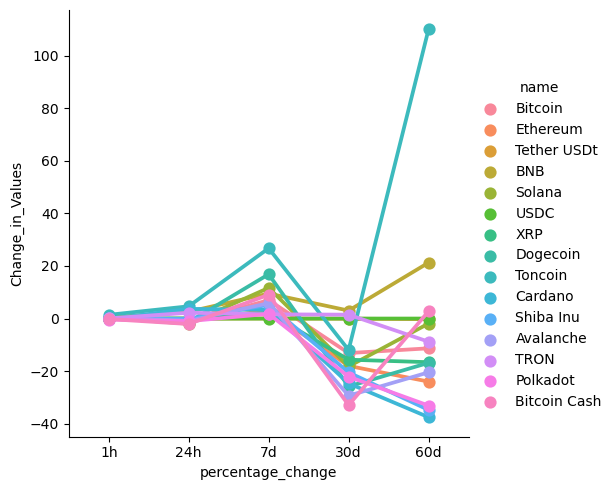

In [56]:
sb.catplot(x='percentage_change', y='Change_in_Values', hue='name', data=df7, kind='point')

In [57]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,61606.38718,2024-05-09 11:04:34.746375
15,Bitcoin,61625.91687,2024-05-09 11:05:45.181920
30,Bitcoin,61591.57248,2024-05-09 12:02:11.035546
45,Bitcoin,61584.89124,2024-05-09 12:03:12.455221
60,Bitcoin,61605.91155,2024-05-09 12:04:13.957552
75,Bitcoin,61608.20368,2024-05-09 12:05:15.348174


C:\Users\DENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

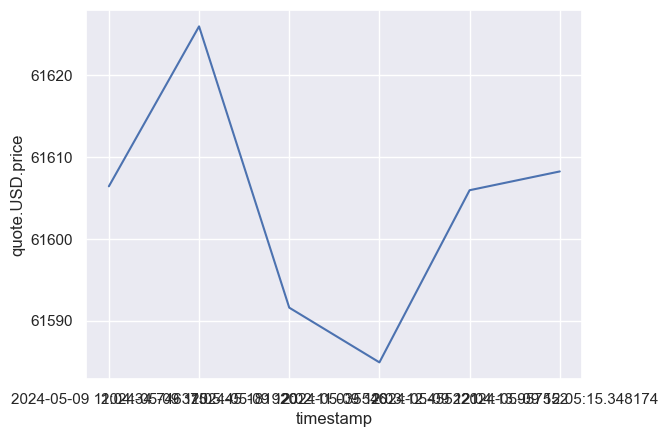

In [59]:
sb.set_theme(style="darkgrid")

sb.lineplot(x='timestamp', y='quote.USD.price', data = df10)